# Project: No-show Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

< a id='intro'></a>
## Introduction


The No-Show Appointment dataset will be analysed in this report. This dataset contains information collected from over 100k medical appointments in Brazil. Its features include the patient id, appointment id, gender, age, neighbourhood (location of hospital), sms_received, scheduled day, appointment day, scholarship (for patients enrolled in the Brasillian welfare program), and four health challenge categories: hypertension, diabetes, alcoholism, and handicap, and the no_show feature which tells whether the patient showed up for the appointment or not.

The analysis of this dataset will be used to answer the following questions:

• Do more patients enrolled in the Brasillian welfare program make their appointment? By how much? 

• What age group of patients are less likely to show up for their appointment? 

• Does receiving SMS affect the turn-up of patients? 

• What age group do the majority of patients who do not show up for their appointment and are enrolled in the Brasillian welfare program belong to? 

• What is the proportional distribution of patients in each health challenge category?

In [1]:
#import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set_style("darkgrid")


<a id='wrangling'></a>
## Wrangling

In this section of the report, the data will be **loaded** in, **assessed**, and **cleaned** to obtain a high quality data for analysis.

### General Properties

In [2]:
# Load your data
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

#assess the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#determine shape of dataset 
df.shape

(110527, 14)

The dataset has 110527 **columns** and 14 **rows**.

In [4]:
#get information on dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#get info on duplicate rows 
df.duplicated().sum()

0

There are **no duplicate rows** in the dataset.

In [6]:
#check for number of null rows 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The dataset has **no null values** in each column.

In [7]:
#get datatype of columns 
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


### Data Cleaning 

While the questions posed to be answered by analysing this dataset requires certain columns, some others not necessary for this analysis were noted during data assessment and were dropped in this section. These columns include: The "PatientId" and "AppointmentID" columns which are personal, and the "ScheduledDay" as well as the "AppointmentDay" columns which will not be useful. 

After removing these columns, duplicate rows were found and removed, and all the columns were renamed for better uniformity. The data type of each column left in the dataset is appropriate for this analysis, and therefore will not be changed.

In [8]:
#drop unnecessary columns 
df = df.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"], axis = 1)

#check the new dataset 
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#check for duplicate rows again after removing those colums  
df.duplicated().sum()

68974

**68974 duplicate rows** were found.

In [10]:
#remove duplicate rows 
df.drop_duplicates(inplace = True) 

#check to ensure duplicate rows have been removed 
df.duplicated().sum()

0

In [11]:
#check new shape of dataset 
df.shape

(41553, 10)

The dataset now has **41553 rows** and **10 columns**.

In [12]:
#rename columns 
df = df.rename(columns = lambda x: x.strip().lower().replace("-", "_"))
df = df.rename(columns = {"hipertension" : "hypertension", "handcap" : "handicap"})

#check column names 
df.head(1)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No




To answer questions associated with age groups during this analysis, a new column categorizing age was created in this section. According to Statistics Canada https://www.statcan.gc.ca/en/concepts/definitions/age2 , age can be grouped into four: Children - 0 to 14 years, Youths - 15 to 24 years, Adults - 25 to 64 years, and Seniors - 65 and over. 

This method of categorization was used in creating a new column for age groups.

In [13]:
#create a new age range column 
df.age.describe() 


count    41553.000000
mean        42.085168
std         23.071325
min         -1.000000
25%         23.000000
50%         43.000000
75%         60.000000
max        115.000000
Name: age, dtype: float64



A detour was first taken to correct the minimum age value which is -1. Usually, ages are not negative, therefore, this had to be corrected by changing -1 to 1, a positive number.

In [14]:
#replace the -1 age with 1
df["age"] = df["age"].replace(-1, 1)
#check to confirm the the value has been changed 
df.query('age == -1')

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [15]:
#check description of the age column again
df.age.describe()

count    41553.000000
mean        42.085216
std         23.071237
min          0.000000
25%         23.000000
50%         43.000000
75%         60.000000
max        115.000000
Name: age, dtype: float64

The minimum age is now 0.

In [16]:
#create new age group column  
#first create the groups
bin_edges = [0, 14, 24, 64, 115] 
bin_labels = ["Children", "Youth", "Adult", "Senior"] 
age_levels = pd.cut(df.age, bins = bin_edges, labels = bin_labels) 

#then create the new age_level column 
df["age_group"] = age_levels

In [17]:
#check the dataframe to confirm addition of new column 
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Adult
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Children
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult


In [18]:
#check new shape of dataset 
df.shape

(41553, 11)

The cleaned dataset has **41553 rows** and **11 columns**.

**On the scholarship, health challenge categories, and sms_received columns, rows with values as 1 represent True, and 0 represent False**.

<a id='eda'></a>
## Exploratory Data Analysis

In [19]:
#First let's separate the dataset into data frames for patients who shows up and patients who don't 
showed = df.query('no_show == "Yes"')
not_showed = df.query('no_show == "No"') 
#check data frames
showed.head() 
not_showed.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Adult
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Children
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult


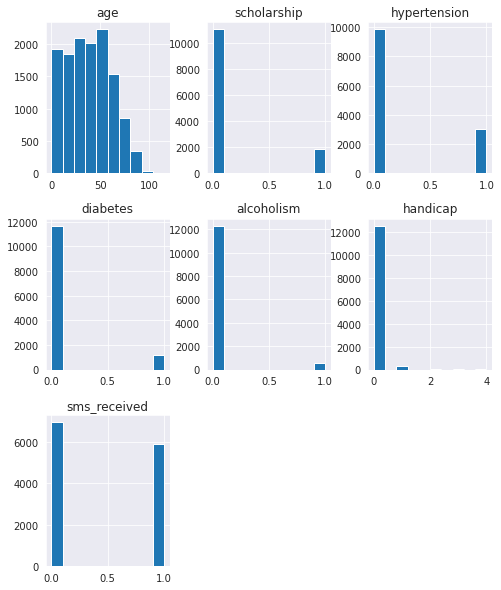

In [20]:
#let's visualize our dataset for patients who showed up for their appointment 
showed.hist(figsize = (8,10));

The histograms above are visualizations of some characteristics associated with patients that showed up for their appointment.

#### Observation

• Most of the patients were not on scholarship (enrolled in the Brasillian welfare program), and did not receive SMS. 

• Most were hypertensive patients, followed by diabetic patients. The handicapped patients showed up the least, followed by patients suffering from alcoholism.

• The age histogram is more skewed to the left.

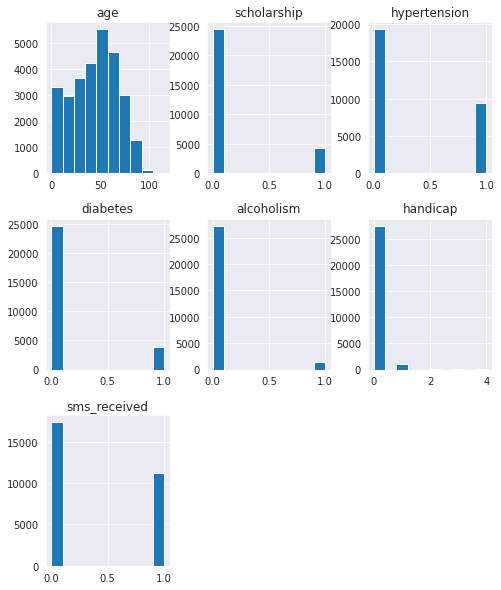

In [21]:
#next we visualize our dataset for patients who didn't show up for their appointment 
not_showed.hist(figsize = (8,10));


The histograms above represent visualizations of some characteristics associated with patients that did not show up for their appointment.

#### Observation  

The characteristics are the same as the patients who showed up for their appointment except in numbers. The patients are more in number in this dataset. 

### Q1: Do more patients enrolled in the Brasillian welfare program make their appointment?  By how much?

Here, I determined the proportion of patients on scholarship (having a value of 1, as 1 represents True) that showed up for their appointment, and visualized the difference between them and those on scholarship (having a value of 0, which represents False) who did not. 

I also created a function to determine the proportion of any variable for reusability.

In [22]:
#we will begin by getting the number of patients on scholarship who made their appointment 
df_showed = showed.scholarship.sum() 

#we get the number of patients on scholarship who didn't make their appointment 
df_not_showed = not_showed.scholarship.sum() 

#we get the total number of patients on scholarship
df_total = df.scholarship.sum()  


In [23]:
#create function for proportion 
def proportion(part_val, whole_val):
    return part_val / whole_val 

#get proportion
ind_sum = [df_showed, df_not_showed]
proportions = proportion(ind_sum, df_total)

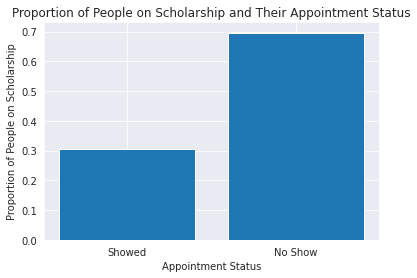

In [24]:
#visualize the difference in proportion of people on scholarship who made and did not make their appointment 
x_nums = np.arange(len(proportions)) 
x_labels = ["Showed", "No Show"]

plt.bar(x_nums, proportions, tick_label = x_labels) 
plt.title("Proportion of People on Scholarship and Their Appointment Status")
plt.xlabel("Appointment Status") 
plt.ylabel("Proportion of People on Scholarship");

#### Observation

There are more patients who did not show up for their appointment than patients who did.

### Q2: What age group of patients are less likely to show up for their appointment?  

To answer this question, I determined the number of patients in each age group category that showed up for their appointment and checked for the group with the least number of patients.

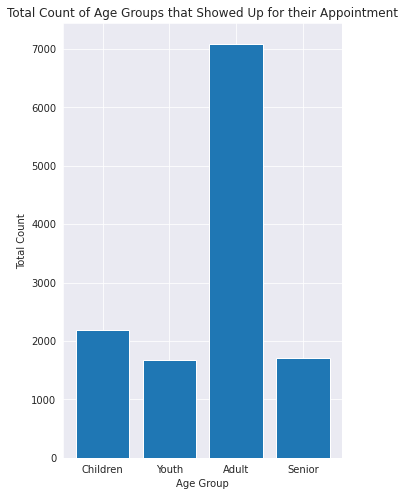

In [25]:
#group the not_showed dataframe by age group and obtain the count of no show for each, ie number of people 
counts = showed.groupby("age_group")["no_show"].count() 


#let's plot this 
x_num = np.arange(len(counts)) 
x_labels = ["Children", "Youth", "Adult", "Senior"] 

plt.figure(figsize = (5,8))
plt.bar(x_num, counts, tick_label = x_labels) 
plt.title("Total Count of Age Groups that Showed Up for their Appointment") 
plt.xlabel("Age Group") 
plt.ylabel("Total Count");


#### Observation

The majority of patients that show up for their appointment are in the adult age group, followed by children. 

The least age group of patients that do are youths, followed by seniors.

### Q3: Does receiving SMS affect the turn-up of patients? 

I selected out the rows that received SMS in both the showed and not_showed data frames (rows in which the value in the sms_received column is 1) and got the total sum for each.

In [26]:
#filter the showed dataframe to get only the rows of patients who received SMS 
showed_sms = showed.query('sms_received == 1') 

#get the sum of patients who received sms in the filtered showed dataframe
num_showed = showed_sms["sms_received"].sum()



In [27]:
#filter the not_showed dataframe to get only the rows of patients who received SMS 
not_showed_sms = not_showed.query('sms_received == 1') 

#get the sum of patients who received sms in the filtered not_showed dataframe 
num_not_showed = not_showed_sms.sms_received.sum()

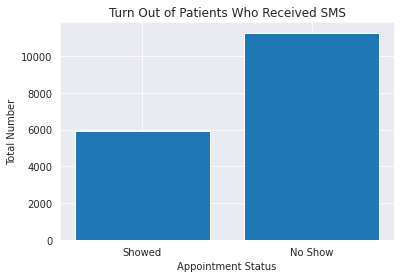

In [28]:
#plot 
yvalues = [num_showed, num_not_showed] 
x_num = np.arange(len(yvalues))
x_labels = ["Showed", "No Show"] 

plt.bar(x_num, yvalues, tick_label = x_labels) 
plt.title("Turn Out of Patients Who Received SMS")
plt.xlabel("Appointment Status") 
plt.ylabel("Total Number");

#### Observation  

A higher number of patients did not show up for their appointment.

### Q4: What age group do the majority of patients who do not show up for their appointment and are enrolled in the Brasillian welfare program belong to?  

Using the not_showed dataframe I created earlier, first, I filtered out the rows of patients on scholarship, and then determined the total number of patients on scholarship in each age group.

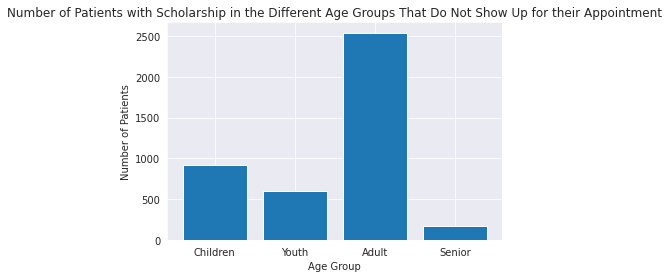

In [29]:
#get the number of patients on scholarship belonging to the different age groups who did not show up for their appointment
df_num = not_showed.query('scholarship == 1').groupby('age_group')['scholarship'].sum() 

#plot
x_num = np.arange(len(df_num)) 
x_labels = ["Children", "Youth", "Adult", "Senior"] 

plt.bar(x_num, df_num, tick_label = x_labels) 
plt.title("Number of Patients with Scholarship in the Different Age Groups That Do Not Show Up for their Appointment") 
plt.xlabel("Age Group") 
plt.ylabel("Number of Patients");


#### Observation

More adults do not show up compared to patients in the other age groups. Children come next.

The least age group that does not show up are seniors, followed by youths.



### Q5: What is the proportional distribution of patients in each health challenge category? 

Here, the proportion of patients that showed up and did not show up was obtained for each health challenge category and visualized.

The value 1 represents True in the various health challenge category, and 0 represents False.

In [30]:
#obtain the sum of patients who showed up in the various health challenge category
showed_count = showed[["hypertension", "diabetes", "alcoholism", "handicap"]].sum() 

#obtain the total number of patients in the various health challenges 
total_count = df[["hypertension", "diabetes", "alcoholism", "handicap"]].sum() 

In [31]:
#obtain the sum of patients who did not show up in the various health challenge category
not_showed_count = not_showed[["hypertension", "diabetes", "alcoholism", "handicap"]].sum() 
not_showed_count

hypertension    9406
diabetes        3894
alcoholism      1414
handicap        1294
dtype: int64

In [32]:
#obtain proportions for the various categories in the showed dataframe
proportion_showed = proportion(showed_count, total_count) 

#obtain proportions for the various categories in the not_showed dataframe 
proportion_not_showed = proportion(not_showed_count, total_count)

In [33]:
np.arange(len(proportion_showed))

array([0, 1, 2, 3])

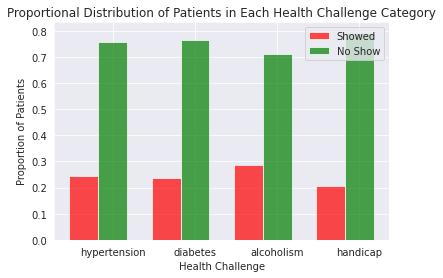

In [34]:
#plot for the proportion in the showed dataframe
ind = np.arange(len(proportion_showed))
width = 0.35 
labels = ["hypertension", "diabetes", "alcoholism", "handicap"] 
locations = ind + width / 2

red_bars = plt.bar(ind, proportion_showed, width, color = 'r', alpha = .7, label = "Showed", tick_label = labels)
green_bars = plt.bar(ind + width, proportion_not_showed, width, color = 'g', alpha = .7, label = "No Show", tick_label = labels)

plt.ylabel("Proportion of Patients")
plt.xlabel("Health Challenge") 
plt.title("Proportional Distribution of Patients in Each Health Challenge Category")  

#legend 
plt.legend();


The proportion of patients that did not show up for their appointment is higher in each category compared to the proportion that showed up.

Amongst the proportion in each health challenge group that showed up for their appointment, patients suffering from alcoholism have the highest, and handicapped patients are the least.

<a id='conclusions'></a>
## Conclusion

According to my findings in the exploratory analysis phase of this data, my conclusions are that: 

• Most patients enrolled in the Brasillian welfare program do not show up for their appointment.

• Patients in the youth age group are the least likely to show up for their appointment.

• Most people who receive SMS do not show up for their appointment.

• Amongst the patients enrolled in the Brasillian welfare program, adults do not show up for their appointment the most.

• Generally, a high proportion of the patients in the various health challenge categories do not show up for their appointment.

-- A higher proportion of handicapped patients do not show up compared to the proportion of patients in the other categories that do not show up. 

-- Also,  a higher proportion of patients suffering from alcoholism show up for their appointment than the proportion of patients with other health challenges who do.
 
It is important to note that some columns from the original dataset were removed in the cleaning process, and if they were included during this analysis, the results obtained may be different. Hence, the analysis carried out using this data is purely experimental and subject to future change. 

### Reference Link 

https://www.statcan.gc.ca/en/start